In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.7/727.7 kB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 62.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 15.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=c7c4cb728740f23e18906465066a1d4251c0a77e097436a0080debe2b7659740
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstall

In [3]:
from ISLP import load_data
Boston = load_data('Boston')
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [4]:
Boston.shape

(506, 13)

10b - 506 rows and 13 columns. This dataset represents housing values in Boston.

10c -

In [5]:
import pandas as pd

array([[<Axes: xlabel='crim', ylabel='crim'>,
        <Axes: xlabel='zn', ylabel='crim'>,
        <Axes: xlabel='indus', ylabel='crim'>,
        <Axes: xlabel='chas', ylabel='crim'>,
        <Axes: xlabel='nox', ylabel='crim'>,
        <Axes: xlabel='rm', ylabel='crim'>,
        <Axes: xlabel='age', ylabel='crim'>,
        <Axes: xlabel='dis', ylabel='crim'>,
        <Axes: xlabel='rad', ylabel='crim'>,
        <Axes: xlabel='tax', ylabel='crim'>,
        <Axes: xlabel='ptratio', ylabel='crim'>,
        <Axes: xlabel='lstat', ylabel='crim'>,
        <Axes: xlabel='medv', ylabel='crim'>],
       [<Axes: xlabel='crim', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='indus', ylabel='zn'>,
        <Axes: xlabel='chas', ylabel='zn'>,
        <Axes: xlabel='nox', ylabel='zn'>,
        <Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='age', ylabel='zn'>,
        <Axes: xlabel='dis', ylabel='zn'>,
        <Axes: xlabel='rad', ylabel='zn'>,
        <Axes: x

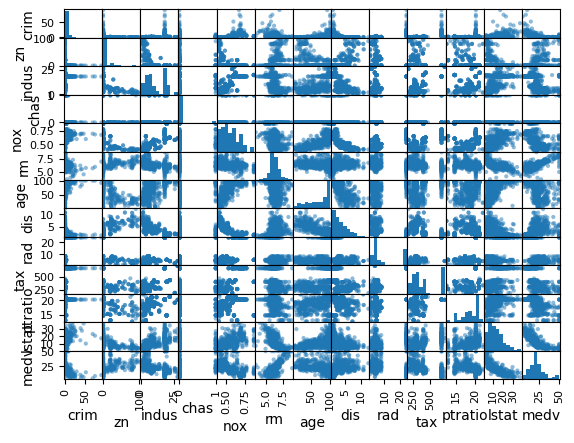

In [6]:
pd.plotting.scatter_matrix(Boston)

In [10]:
import matplotlib.pyplot as plt

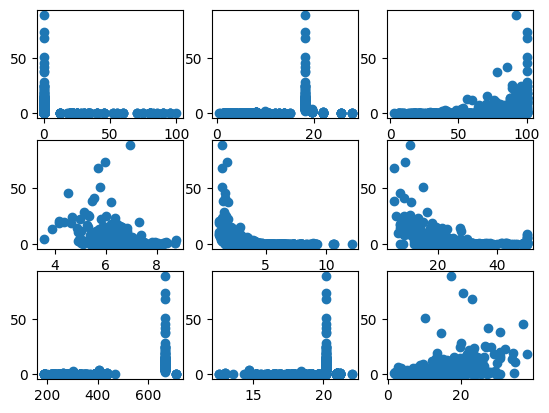

In [31]:
fig, axs = plt.subplots(3, 3)
axs[0, 0].scatter(Boston["zn"], Boston["crim"])
axs[0, 1].scatter(Boston["indus"], Boston["crim"])
axs[0, 2].scatter(Boston["age"], Boston["crim"])
axs[1, 0].scatter(Boston["rm"], Boston["crim"])
axs[1, 1].scatter(Boston["dis"], Boston["crim"])
axs[1, 2].scatter(Boston["medv"], Boston["crim"])
axs[2, 0].scatter(Boston["tax"], Boston["crim"])
axs[2, 1].scatter(Boston["ptratio"], Boston["crim"])
axs[2, 2].scatter(Boston["lstat"], Boston["crim"])

10d - There are several indicators that have a relationship with the crime rate. For example:


*   dis: A smaller weighted distance to Boston employment center correlates with higher crime rate.
*   medv: A higher median value of owner-occupied homes correlates with a lower crime rate.
*   age: A proportion of owner-occupied units built before 1940 correlates with a higher crime rate.

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

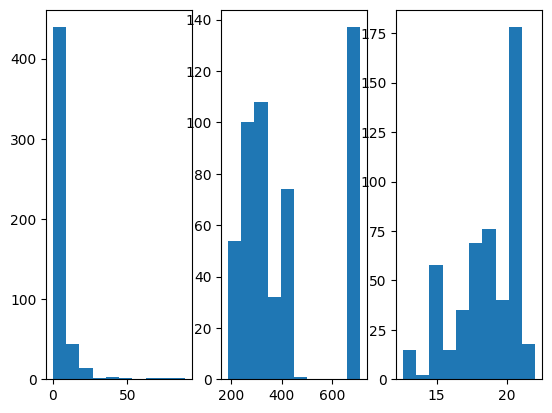

In [35]:
fig, axs = plt.subplots(1, 3)
axs[0].hist(Boston["crim"])
axs[1].hist(Boston["tax"])
axs[2].hist(Boston["ptratio"])

10e -



*   There are few cities that have a significantly higher crime rate than the rest. The highest 10 cities in the list have over 400 crimes, while the next 10 cities have less than 50, and even smaller for the rest of the cities.
*   There is a large disparity in the full-value property tax rate amongst cities. Some charge just shy of 140% while some charge nearly 0%.  
*   Most of the cities have a pupil-teacher ratio between 25 to 75; however, there are outlier cities that have more than 175 pupils per teacher and some with single-digit pupil/teacher ratios.




In [38]:
Boston["chas"].value_counts(1)

0    0.93083
1    0.06917
Name: chas, dtype: float64

10f - 0.06917*506 = 35 cities.

In [39]:
Boston["ptratio"].median()

19.05

10g - 19.05 is the median pupil-teacher ratio.

In [40]:
Boston["medv"].idxmin()

398

In [45]:
Boston.iloc[398,:]

crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64

In [47]:
for col in Boston.columns:
  print("Average for {} is {}".format(col, Boston[col].mean()))

Average for crim is 3.613523557312254
Average for zn is 11.363636363636363
Average for indus is 11.13677865612648
Average for chas is 0.0691699604743083
Average for nox is 0.5546950592885376
Average for rm is 6.284634387351779
Average for age is 68.57490118577076
Average for dis is 3.795042687747036
Average for rad is 9.549407114624506
Average for tax is 408.2371541501976
Average for ptratio is 18.455533596837945
Average for lstat is 12.653063241106722
Average for medv is 22.532806324110677


10h - Index number 398 is the suburb with lowest median value of owner-occupied homes. Some interesting findings include:

*   The crime rate is 10 times lower than average.
*   Residential land zoned for over 25000 sqft is 11% lower than mean
*   Full-value property tax is more than 1.5 times than average.
*   Proportion of lower status population is 2.5 times higher.
*   Index of accessibility to radial highway is more than 2.5 times higher.


In [50]:
len(Boston[Boston['rm'] > 7]['rm'])

64

In [51]:
len(Boston[Boston['rm'] > 8]['rm'])

13

In [55]:
df = Boston[Boston['rm'] > 8]
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,4.21,38.7
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,3.32,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,2.88,50.0
224,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,4.14,44.8
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,4.63,50.0
226,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,3.13,37.6
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,2.47,41.7
233,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,3.95,48.3
253,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,3.54,42.8
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,5.12,50.0


In [56]:
for col in Boston.columns:
  print("Average for {} is {}".format(col, df[col].mean()))

Average for crim is 0.7187953846153845
Average for zn is 13.615384615384615
Average for indus is 7.078461538461539
Average for chas is 0.15384615384615385
Average for nox is 0.5392384615384616
Average for rm is 8.348538461538462
Average for age is 71.53846153846153
Average for dis is 3.430192307692307
Average for rad is 7.461538461538462
Average for tax is 325.0769230769231
Average for ptratio is 16.36153846153846
Average for lstat is 4.31
Average for medv is 44.2


10i - 64 have more than 7 rooms per dwelling, 13 have more than 8 rooms per dwelling. Some interesting findings about suburbs with more than 8 rooms per dwelling:

*   Crime rate is 5 times less on average than average of Boston.
*   Average full-value property tax is about 20% less than average of Boston.
*   3 times smaller proportion of lower status population.
*   Median value of owner-occupied homes is almost 2 times Boston average.




